In [1]:
from google.colab import drive
drive.mount('/GDrive')
%cd /GDrive/MyDrive/freefleks

Mounted at /GDrive
/GDrive/MyDrive/freefleks


In [2]:
from model import CreateModel
from load_data import load_dataset
from utils import calculate_meanIoU
from tools import show_results

Запустите закомментированный код ниже если необходимо обучить модель

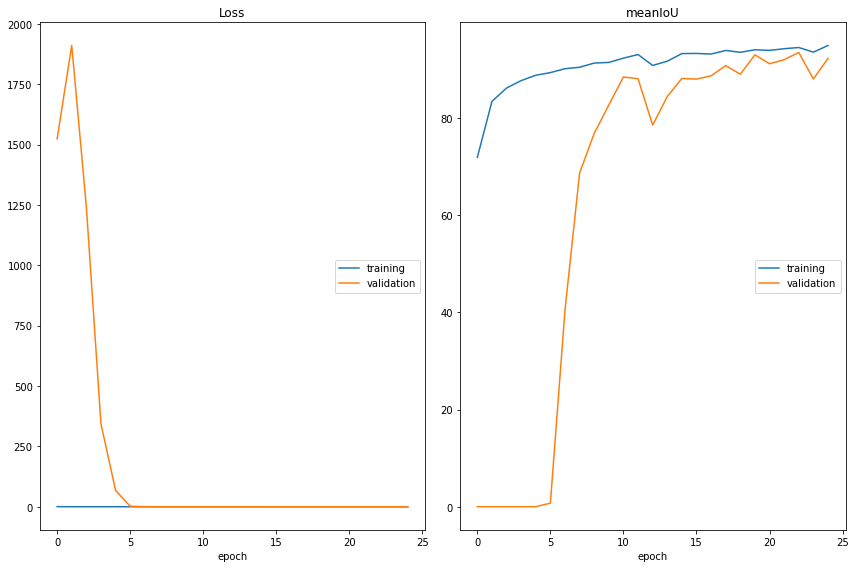

Loss
	training         	 (min:    0.000, max:    0.371, cur:    0.000)
	validation       	 (min:    0.000, max: 1910.200, cur:    0.000)
meanIoU
	training         	 (min:   71.862, max:   94.877, cur:   94.877)
	validation       	 (min:    0.000, max:   93.436, cur:   92.210)


In [3]:
# try:
#     from livelossplot import PlotLossesKeras
# except ModuleNotFoundError:
#     !pip install livelossplot > /dev/null
#     from livelossplot import PlotLossesKeras
# from train import train_model

# my_model = train_model()

In [4]:
# my_model.save('/GDrive/MyDrive/freefleks/saved_models/model_1')

INFO:tensorflow:Assets written to: /GDrive/MyDrive/freefleks/saved_models/model_valid_mIoU_92_over_25_epoch_lr_10_-2/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [3]:
cnn = CreateModel('MobileNetV2')
my_model =  cnn.assemble_model()
my_model.load_weights('/GDrive/MyDrive/freefleks/saved_models/model_valid_mIoU_92_22_over_25_epoch_lr_10_-2')

In [4]:
x_valid, y_valid = load_dataset(preprocess_x_valid=True,
                                only_x_and_y_valid = True)

y_valid_pred = my_model.predict(x_valid)
print(f'MeanIoU: {calculate_meanIoU(y_valid, y_valid_pred)}')

del(x_valid) # удаляем, т.к. эти изображения уже изменены функцией препроцессинга

MeanIoU: 92.22492546428347


In [5]:
x_valid, y_valid = load_dataset(preprocess_x_valid=False,
                                only_x_and_y_valid = True)

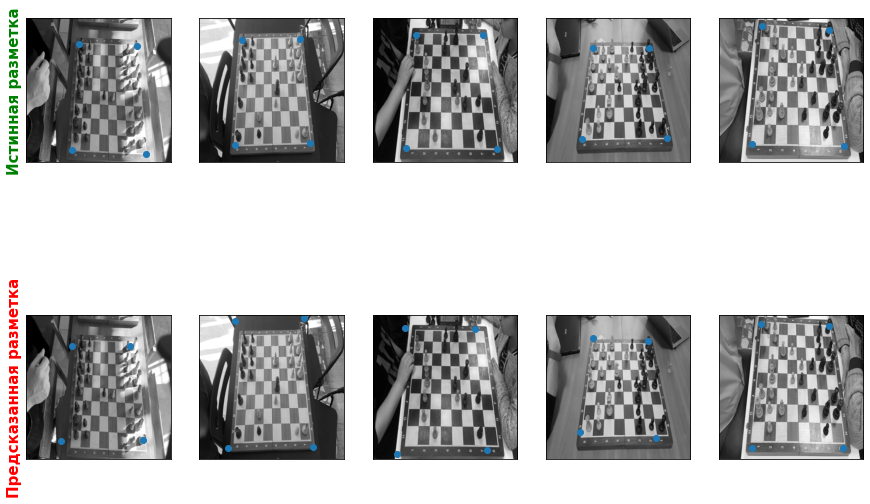

In [10]:
show_results(5, x_valid, y_valid, y_valid_pred)

#Итог:
На выбранной архитектуре, поэкспериментировав с гиперпораметрами удалось достич значения метрики meanIoU равной 92.22% на валидационном датасете. Предполагаю, что дальнейшее увеличение метрики возможно при разных сценариях. Например, добавить ряд свёрточных слоёв после базовой модели, использовать другую архитектуру, аугментировать (например путём поворотов или масштабирования с обрезание) тренеровочного набора данных.